In [3]:
import warnings; warnings.simplefilter("ignore")
import requests, zipfile, io
from urllib.request import urlopen
import pandas as pd
import sklearn.mixture as mix
import datetime as dt
import numpy as np
import scipy.stats as scs

import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
plt.style.use('fivethirtyeight')
%matplotlib inline

import seaborn as sns
# pip install missingno
import missingno as msno
from tqdm import tqdm
p = print

                  SPY      sret
2005-01-03  86.004448       NaN
2005-01-04  84.953499 -0.012295
2005-01-05  84.367264 -0.006925
2005-01-06  84.796242  0.005072
2005-01-07  84.674660 -0.001435


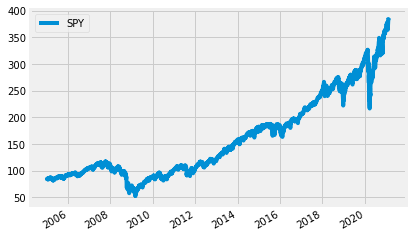

In [17]:
def getYahoo(symbol,start_dt,end_dt):
    dt_start = int(dt.datetime.strptime(start_dt,'%Y-%m-%d').timestamp())
    dt_end = int(dt.datetime.strptime(end_dt,'%Y-%m-%d').timestamp())
    url='https://query1.finance.yahoo.com/v7/finance/download/'
    url+=symbol
    url+='?period1='
    url+=str(dt_start)
    url+='&period2='
    url+=str(dt_end)
    url+='&interval=1d&events=history&includeAdjustedClose=true'
    #print(url)
    mfile=urlopen(url)
    dfm = pd.read_csv(mfile,index_col=0,header=0)
    dfm.index = [dt.datetime.strptime(str(date)[0:10],"%Y-%m-%d") for date in dfm.index.values]
    return dfm
start_date = "2005-01-01"
end_date = "2021-02-13"
dfa = getYahoo("SPY",start_date, end_date)
dfa = dfa[["Adj Close"]]
dfb = np.log(dfa["Adj Close"]/dfa["Adj Close"].shift(1)).dropna()
dfa = pd.concat([dfa,dfb],axis=1)
dfa.columns = ["SPY","sret"]
print(dfa.head())
dfa[["SPY"]].plot()